In [1]:
# Contraceptive_method_dataset
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.


In [2]:
# load the dataset 

data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [3]:
# First 5 rows of Data set 

data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
# last  rows of Dataset

data.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
# Shape of the Dataset

data.shape

(1473, 10)

In [6]:
# Datatypes

type(data)

pandas.core.frame.DataFrame

In [7]:
# Columns

data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [8]:
# To search for missing values

data.isnull().sum() 

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [9]:
data[['Wife_age','No_of_children_born']].isnull().sum().any()

True

In [10]:
from sklearn.impute import SimpleImputer


In [11]:
#Impute Nans in Age column mby taking the median

imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['No_of_children_born'] = imp.fit_transform(data['No_of_children_born'].values.reshape(-1,1))
data['Wife_age'] = imp.fit_transform(data['Wife_age'].values.reshape(-1,1))


In [12]:
data.isnull().sum().any()

False

In [13]:
# Info of Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [14]:
# Data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


#### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.¶


In [15]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print(feature)
        print(data[feature].value_counts())
        print('\n')


Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


Wife_Working
No     1104
Yes     369
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




In [16]:
# To find missing values

data.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [17]:
# To find duplicated values

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)


Number of duplicate rows = 85
(1473, 10)


In [18]:
# To drop duplicated values

data.drop_duplicates(inplace=True) 


In [19]:
# To check and sum of duplicated values

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data.shape)


Number of duplicate rows = 0
(1388, 10)


In [20]:
# Check for the basic measures of descriptive statistics.

data.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1388.000000,1388.000000,1388.000000
mean,32.533862,3.287464,2.177954
std,8.102151,2.385715,0.853782
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


In [21]:
# calculate a 5-number summary

from numpy import percentile
from numpy.random import rand

# generate data sample
sample = rand(1000)

# calculate quartiles
quartiles = percentile(sample, [25, 50, 75])

# calculate min/max
sample_min, sample_max = sample.min(), sample.max()

# print 5-number summary
print('Min: %.3f' % sample_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % sample_max)

Min: 0.001
Q1: 0.237
Median: 0.474
Q3: 0.747
Max: 0.999


#### Check the spread of the data using boxplot for the continuous variables.


In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5


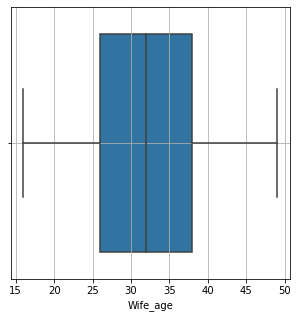

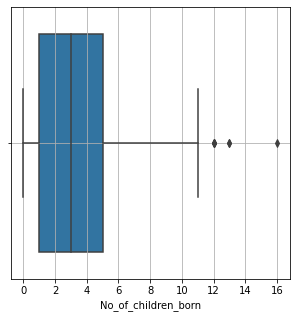

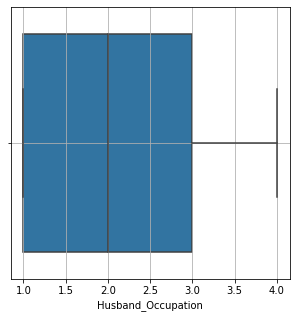

In [23]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();


### Treating the outliers at 1.5 * IQR (Inter-Quartile Range).
For this exercises, we are not treating the outliers. But please do play around with the data and try out such treatments.

In [24]:
# # Defining a function for getting the Upper and Lower limt acceptance of the outliers at 1.5*IQR. 
# # We can choose to treat the outliers at 3*IQR as well

def remove_outlier(col):
     sorted(col)
     Q1,Q3=np.percentile(col,[25,75])
     IQR=Q3-Q1
     lower_range= Q1-(1.5 * IQR)
     upper_range= Q3+(1.5 * IQR)
     return lower_range, upper_range


In [25]:
## This is a loop to treat outliers for all the non-'object' type varible

for column in data.columns:
     if data[column].dtype != 'object': 
         lr,ur=remove_outlier(data[column])
         data[column]=np.where(data[column]>ur,ur,data[column])
         data[column]=np.where(data[column]<lr,lr,data[column])


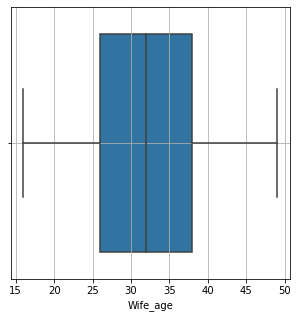

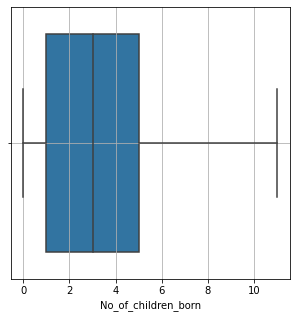

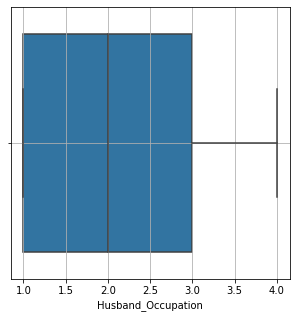

In [26]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.grid()
    plt.show();

In [27]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2.0,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3.0,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3.0,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3.0,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3.0,Low,Exposed,No


### Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue.

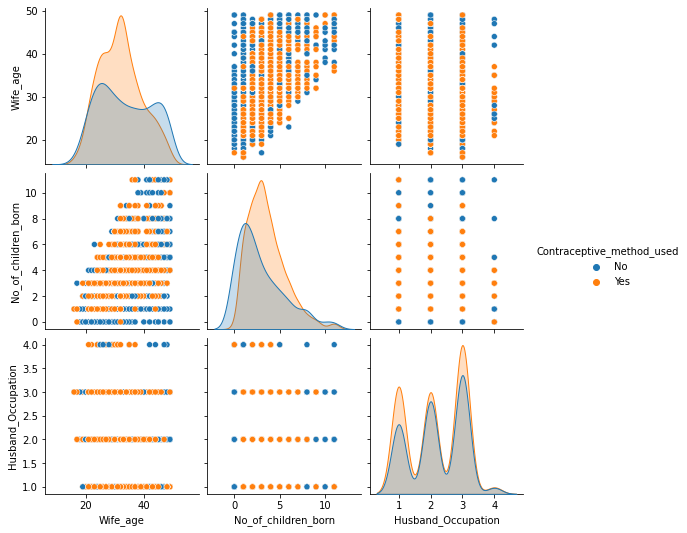

In [28]:
# Pairplot using sns

sns.pairplot(data, diag_kind='kde', hue= 'Contraceptive_method_used');


In [29]:
# Checking for Correlations. Print the correlation matrix and the correlation heatmap.

data.corr()

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.530196,-0.188114
No_of_children_born,0.530196,1.000000,-0.022172
Husband_Occupation,-0.188114,-0.022172,1.000000


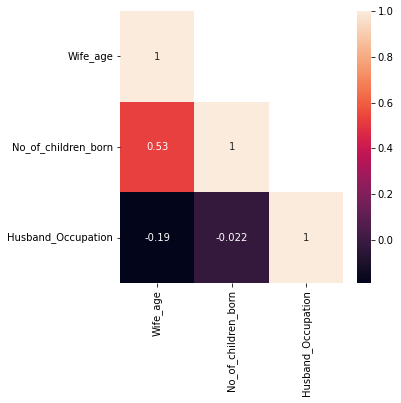

In [30]:
# To Plot Heatmap

sns.heatmap(data.corr(), annot=True,mask=np.triu(data.corr(),+1));

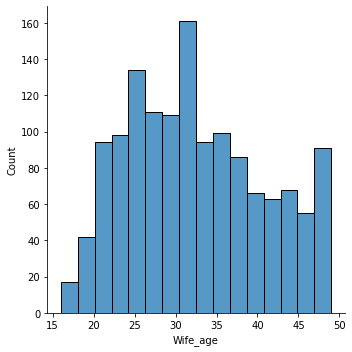

In [31]:
# To Plot displot for 'Wife_age'

sns.displot(data['Wife_age']);


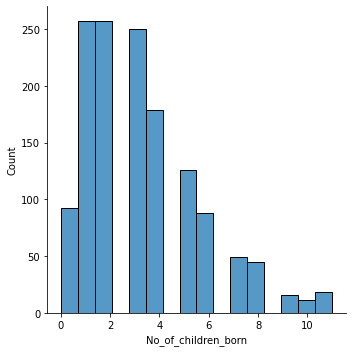

In [32]:
# To Plot displot for 'No_of_children_born'

sns.displot(data['No_of_children_born']);


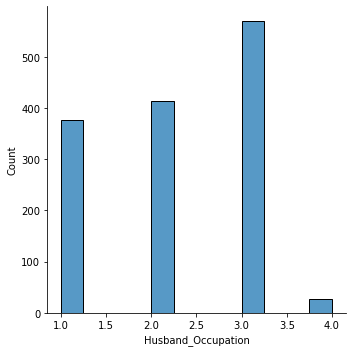

In [33]:
# To Plot displot for 'Husband_Occupation'

sns.displot(data['Husband_Occupation']);


#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors.


#### Treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

In [34]:
data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [35]:
data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2.0,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3.0,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3.0,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3.0,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3.0,Low,Exposed,No


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   object 
 2   Husband_education          1388 non-null   object 
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   object 
 5   Wife_Working               1388 non-null   object 
 6   Husband_Occupation         1388 non-null   float64
 7   Standard_of_living_index   1388 non-null   object 
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   object 
dtypes: float64(3), object(7)
memory usage: 119.3+ KB


#### Change the names of the variables in a suitable way for building the logistic regression model.

In [37]:
data.rename(columns = {'Wife_ education':'Wife_education', 'Media_exposure ':'Media_exposure'}, inplace = True)


In [38]:
## We are coding up the 'Wife_education' variable in an ordinal manner

data['Wife_education']=np.where(data['Wife_education'] =='Tertiary', '1',data['Wife_education'])
data['Wife_education']=np.where(data['Wife_education'] =='Secondary', '2', data['Wife_education'])
data['Wife_education']=np.where(data['Wife_education'] =='Primary', '3', data['Wife_education'])
data['Wife_education']=np.where(data['Wife_education'] =='Uneducated', '4', data['Wife_education'])


In [39]:
## We are coding up the 'Husband_education' variable in an ordinal manner

data['Husband_education']=np.where(data['Husband_education'] =='Tertiary', '1',data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Secondary', '2', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Primary', '3', data['Husband_education'])
data['Husband_education']=np.where(data['Husband_education'] =='Uneducated', '4', data['Husband_education'])


In [40]:
## We are coding up the 'Wife_religion' variable in an ordinal manner

data['Wife_religion']=np.where(data['Wife_religion'] =='Scientology', '1',data['Wife_religion'])
data['Wife_religion']=np.where(data['Wife_religion'] =='Non-Scientology', '2', data['Wife_religion'])


In [41]:
## We are coding up the 'Wife_Working' variable in an ordinal manner

data['Wife_Working']=np.where(data['Wife_Working'] =='No', '1',data['Wife_Working'])
data['Wife_Working']=np.where(data['Wife_Working'] =='Yes', '2', data['Wife_Working'])


In [42]:
## We are coding up the 'Standard_of_living_index' variable in an ordinal manner

data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Very High', 1,data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='High', 2, data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Low', 3, data['Standard_of_living_index'])
data['Standard_of_living_index']=np.where(data['Standard_of_living_index'] =='Very Low', 4, data['Standard_of_living_index'])


In [43]:
## We are coding up the 'Media_exposure' variable in an ordinal manner

data['Media_exposure']=np.where(data['Media_exposure'] =='Exposed','1',  data['Media_exposure'])
data['Media_exposure']=np.where(data['Media_exposure'] =='Not-Exposed', '2', data['Media_exposure'])


In [44]:
## We are coding up the 'Contraceptive_method_used' variable in an ordinal manner

#data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] =='Yes', '1', data['Contraceptive_method_used'])
#data['Contraceptive_method_used']=np.where(data['Contraceptive_method_used'] =='No', '2', data['Contraceptive_method_used'])


In [45]:
## Converting the 'salary' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()


In [46]:
## Applying the created Label Encoder object for the target class

data['Contraceptive_method_used'] = LE.fit_transform(data['Contraceptive_method_used'])
data.head()


,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,3,2,3.0,1,1,2.0,2,1,0
1,45.0,4,2,10.0,1,1,3.0,1,1,0
2,43.0,3,2,7.0,1,1,3.0,1,1,0
3,42.0,2,3,9.0,1,1,3.0,2,1,0
4,36.0,2,2,8.0,1,1,3.0,3,1,0


In [47]:
# To find dummies and drop Frist column

data_dummy=pd.get_dummies(data)
data_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_education_1,Wife_education_2,Wife_education_3,Wife_education_4,Husband_education_1,Husband_education_2,...,Wife_religion_1,Wife_religion_2,Wife_Working_1,Wife_Working_2,Standard_of_living_index_1,Standard_of_living_index_2,Standard_of_living_index_3,Standard_of_living_index_4,Media_exposure_1,Media_exposure_2
0,24.0,3.0,2.0,0,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
1,45.0,10.0,3.0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
2,43.0,7.0,3.0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
3,42.0,9.0,3.0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,36.0,8.0,3.0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0


In [48]:
# To find dummies and drop Frist column

data_dummy=pd.get_dummies(data,drop_first=True)
data_dummy.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_education_2,Wife_education_3,Wife_education_4,Husband_education_2,Husband_education_3,Husband_education_4,Wife_religion_2,Wife_Working_2,Standard_of_living_index_2,Standard_of_living_index_3,Standard_of_living_index_4,Media_exposure_2
0,24.0,3.0,2.0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,45.0,10.0,3.0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,43.0,7.0,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,42.0,9.0,3.0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,36.0,8.0,3.0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [49]:
data_dummy.head()


,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_education_2,Wife_education_3,Wife_education_4,Husband_education_2,Husband_education_3,Husband_education_4,Wife_religion_2,Wife_Working_2,Standard_of_living_index_2,Standard_of_living_index_3,Standard_of_living_index_4,Media_exposure_2
0,24.0,3.0,2.0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,45.0,10.0,3.0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,43.0,7.0,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,42.0,9.0,3.0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,36.0,8.0,3.0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [50]:
data_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Wife_age                    1388 non-null   float64
 1   No_of_children_born         1388 non-null   float64
 2   Husband_Occupation          1388 non-null   float64
 3   Contraceptive_method_used   1388 non-null   int32  
 4   Wife_education_2            1388 non-null   uint8  
 5   Wife_education_3            1388 non-null   uint8  
 6   Wife_education_4            1388 non-null   uint8  
 7   Husband_education_2         1388 non-null   uint8  
 8   Husband_education_3         1388 non-null   uint8  
 9   Husband_education_4         1388 non-null   uint8  
 10  Wife_religion_2             1388 non-null   uint8  
 11  Wife_Working_2              1388 non-null   uint8  
 12  Standard_of_living_index_2  1388 non-null   uint8  
 13  Standard_of_living_index_3  1388 

In [51]:
## Converting the education variable to numeric

data_dummy['Wife_age'] = data_dummy['Wife_age'].astype('int64')
data_dummy['No_of_children_born'] = data_dummy['No_of_children_born'].astype('int64')
data_dummy['Husband_Occupation'] = data_dummy['Husband_Occupation'].astype('int64')

data_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Wife_age                    1388 non-null   int64
 1   No_of_children_born         1388 non-null   int64
 2   Husband_Occupation          1388 non-null   int64
 3   Contraceptive_method_used   1388 non-null   int32
 4   Wife_education_2            1388 non-null   uint8
 5   Wife_education_3            1388 non-null   uint8
 6   Wife_education_4            1388 non-null   uint8
 7   Husband_education_2         1388 non-null   uint8
 8   Husband_education_3         1388 non-null   uint8
 9   Husband_education_4         1388 non-null   uint8
 10  Wife_religion_2             1388 non-null   uint8
 11  Wife_Working_2              1388 non-null   uint8
 12  Standard_of_living_index_2  1388 non-null   uint8
 13  Standard_of_living_index_3  1388 non-null   uint8
 14  Standard

In [52]:
data_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Wife_age                    1388 non-null   int64
 1   No_of_children_born         1388 non-null   int64
 2   Husband_Occupation          1388 non-null   int64
 3   Contraceptive_method_used   1388 non-null   int32
 4   Wife_education_2            1388 non-null   uint8
 5   Wife_education_3            1388 non-null   uint8
 6   Wife_education_4            1388 non-null   uint8
 7   Husband_education_2         1388 non-null   uint8
 8   Husband_education_3         1388 non-null   uint8
 9   Husband_education_4         1388 non-null   uint8
 10  Wife_religion_2             1388 non-null   uint8
 11  Wife_Working_2              1388 non-null   uint8
 12  Standard_of_living_index_2  1388 non-null   uint8
 13  Standard_of_living_index_3  1388 non-null   uint8
 14  Standard

In [53]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as sm


In [54]:
data_dummy.columns


Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Contraceptive_method_used', 'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2'],
      dtype='object')

In [55]:
formula_1='Contraceptive_method_used ~ Wife_age+No_of_children_born+Husband_Occupation+Wife_education_2+Wife_education_3+Wife_education_4+Husband_education_2+Husband_education_3+Husband_education_4+Wife_religion_2+Wife_Working_2+Standard_of_living_index_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [56]:
Logistic_1 = sm.logit(formula=formula_1,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.610268
         Iterations 5


In [57]:
Logistic_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1372
Method:                                  MLE   Df Model:                           15
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1110
Time:                               14:49:59   Log-Likelihood:                -847.05
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 9.299e-37
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.2893      0.350      6.542      0.000       1.603       2.975
Wife_age                      -0.0782      0.010     -7.969      0.000      -0.097      -0.059
No_of_children_born            0.3214      0.034      9.393      0.000       0.254       0.388
Husband_Occupation             0.1169      0.078      1.497      0.134      -0.036       0.270
Wife_education_2              -0.6765      0.163     -4.142      0.000      -0.997      -0.356
Wife_education_3              -1.1322      0.191     -5.914      0.000      -1.507      -0.757
Wife_education_4              -1.4760      0.273     -5.411      0.000      -2.011      -0.941
Husband_education_2            0.1577      0.161      0.977      0.329      -0.159       0.474
Husband_education_3           -0.0069      0.219     -0.031      0.975      -0.436       0.423
Husband_education_4           -0.3200      0.394     -0.812      0.417      -1.093       0.453
Wife_religion_2                0.3923      0.176      2.234      0.026       0.048       0.737
Wife_Working_2                -0.1484      0.136     -1.091      0.275      -0.415       0.118
Standard_of_living_index_2    -0.2009      0.143     -1.403      0.161      -0.482       0.080
Standard_of_living_index_3    -0.3997      0.181     -2.209      0.027      -0.754      -0.045
Standard_of_living_index_4    -0.7705      0.231     -3.331      0.001      -1.224      -0.317
Media_exposure_2              -0.4840      0.253     -1.913      0.056      -0.980       0.012
==============================================================================================
"""

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).

In [58]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [59]:
vif_cal(input_data=data_dummy.drop('Contraceptive_method_used',axis=1))


Wife_age  VIF =  1.64
No_of_children_born  VIF =  1.53
Husband_Occupation  VIF =  1.28
Wife_education_2  VIF =  1.59
Wife_education_3  VIF =  1.92
Wife_education_4  VIF =  1.97
Husband_education_2  VIF =  1.44
Husband_education_3  VIF =  1.56
Husband_education_4  VIF =  1.25
Wife_religion_2  VIF =  1.13
Wife_Working_2  VIF =  1.04
Standard_of_living_index_2  VIF =  1.26
Standard_of_living_index_3  VIF =  1.34
Standard_of_living_index_4  VIF =  1.32
Media_exposure_2  VIF =  1.27


####  Model 2 - Drop the variable which has the highest VIF value. Build a second iteration of the model on the full data. Check the VIF values of the predictor variables.          Wife_education_4  

### Note : Threshold value considered is VIF < 2

In [60]:
formula_2='Contraceptive_method_used ~ Wife_age+No_of_children_born+Husband_Occupation+Wife_education_2+Wife_education_3+Husband_education_2+Husband_education_3+Husband_education_4+Wife_religion_2+Wife_Working_2+Standard_of_living_index_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [61]:
Logistic_2 = sm.logit(formula=formula_2,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.621210
         Iterations 5


In [62]:
Logistic_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1373
Method:                                  MLE   Df Model:                           14
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09509
Time:                               14:50:02   Log-Likelihood:                -862.24
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 3.674e-31
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.3758      0.346      6.864      0.000       1.697       3.054
Wife_age                      -0.0816      0.010     -8.435      0.000      -0.101      -0.063
No_of_children_born            0.3067      0.033      9.159      0.000       0.241       0.372
Husband_Occupation             0.0359      0.075      0.477      0.633      -0.112       0.184
Wife_education_2              -0.3002      0.147     -2.048      0.041      -0.588      -0.013
Wife_education_3              -0.6147      0.164     -3.751      0.000      -0.936      -0.294
Husband_education_2           -0.0703      0.154     -0.456      0.648      -0.372       0.232
Husband_education_3           -0.4103      0.204     -2.010      0.044      -0.810      -0.010
Husband_education_4           -0.9112      0.379     -2.404      0.016      -1.654      -0.168
Wife_religion_2                0.5150      0.174      2.965      0.003       0.175       0.855
Wife_Working_2                -0.1086      0.134     -0.808      0.419      -0.372       0.155
Standard_of_living_index_2    -0.2320      0.141     -1.645      0.100      -0.508       0.044
Standard_of_living_index_3    -0.4278      0.179     -2.391      0.017      -0.778      -0.077
Standard_of_living_index_4    -0.8331      0.229     -3.637      0.000      -1.282      -0.384
Media_exposure_2              -0.8244      0.245     -3.365      0.001      -1.305      -0.344
==============================================================================================
"""

In [63]:
vif_cal(input_data=data_dummy.drop(['Contraceptive_method_used','Wife_education_4'],axis=1))


Wife_age  VIF =  1.62
No_of_children_born  VIF =  1.53
Husband_Occupation  VIF =  1.24
Wife_education_2  VIF =  1.31
Wife_education_3  VIF =  1.43
Husband_education_2  VIF =  1.34
Husband_education_3  VIF =  1.37
Husband_education_4  VIF =  1.14
Wife_religion_2  VIF =  1.11
Wife_Working_2  VIF =  1.03
Standard_of_living_index_2  VIF =  1.25
Standard_of_living_index_3  VIF =  1.34
Standard_of_living_index_4  VIF =  1.32
Media_exposure_2  VIF =  1.18


#### All the variables have a VIF value less than 5, indicating that there is no multicollinearity between the independent variables. This #### is good, as multicollinearity can affect the reliability of the coefficients estimated in the logistic regression model.


#### It's difficult to determine which variable should be dropped based solely on the Variance Inflation Factor (VIF) values. A 
#### general rule of thumb is that a VIF value above 10 indicates a high level of multicollinearity and that the variable with 
#### the highest VIF should be removed. However, this is just a rough guideline and the decision to drop a variable ultimately 
#### depends on the research question and the goals of the analysis.

#### In the given case, all the variables have VIF values less than or equal to 1.43, which suggests that there is no strong 
#### evidence of multicollinearity. Therefore, it may not be necessary to drop any of the variables based on VIF values alone.

#### It's important to consider other factors such as the theoretical importance of the variables, the magnitude and 
#### significance of their coefficients, and the effect of removing them on the overall model fit. In some cases, it may be 
#### appropriate to keep all the variables in the model even if there is some degree of multicollinearity, as long as the 
#### multicollinearity does not have a major impact on the results.


### Model 3 - Drop the variable which has the highest p-value>0.05 (least significant variable) in the second iteration of the model. Build a third iteration of the model. Check the VIF values of the predictor variables. -  Husband_education_2	

In [64]:
formula_3='Contraceptive_method_used ~ Wife_age+No_of_children_born+Husband_Occupation+Wife_education_2+Wife_education_3+Husband_education_3+Husband_education_4+Wife_religion_2+Wife_Working_2+Standard_of_living_index_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [65]:
Logistic_3 = sm.logit(formula=formula_3,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.621285
         Iterations 5


In [66]:
Logistic_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1374
Method:                                  MLE   Df Model:                           13
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09498
Time:                               14:50:04   Log-Likelihood:                -862.34
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 1.058e-31
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.3889      0.345      6.925      0.000       1.713       3.065
Wife_age                      -0.0817      0.010     -8.461      0.000      -0.101      -0.063
No_of_children_born            0.3057      0.033      9.150      0.000       0.240       0.371
Husband_Occupation             0.0295      0.074      0.399      0.690      -0.115       0.175
Wife_education_2              -0.3145      0.143     -2.195      0.028      -0.595      -0.034
Wife_education_3              -0.6343      0.158     -4.010      0.000      -0.944      -0.324
Husband_education_3           -0.3775      0.191     -1.976      0.048      -0.752      -0.003
Husband_education_4           -0.8812      0.373     -2.359      0.018      -1.613      -0.149
Wife_religion_2                0.5214      0.173      3.013      0.003       0.182       0.861
Wife_Working_2                -0.1117      0.134     -0.833      0.405      -0.375       0.151
Standard_of_living_index_2    -0.2346      0.141     -1.664      0.096      -0.511       0.042
Standard_of_living_index_3    -0.4382      0.177     -2.470      0.014      -0.786      -0.090
Standard_of_living_index_4    -0.8440      0.228     -3.704      0.000      -1.291      -0.397
Media_exposure_2              -0.8290      0.245     -3.388      0.001      -1.309      -0.349
==============================================================================================
"""

In [67]:
vif_cal(input_data=data_dummy.drop(['Contraceptive_method_used','Wife_education_4','Husband_education_2'],axis=1))


Wife_age  VIF =  1.62
No_of_children_born  VIF =  1.52
Husband_Occupation  VIF =  1.2
Wife_education_2  VIF =  1.26
Wife_education_3  VIF =  1.34
Husband_education_3  VIF =  1.19
Husband_education_4  VIF =  1.09
Wife_religion_2  VIF =  1.1
Wife_Working_2  VIF =  1.03
Standard_of_living_index_2  VIF =  1.25
Standard_of_living_index_3  VIF =  1.32
Standard_of_living_index_4  VIF =  1.3
Media_exposure_2  VIF =  1.18


### Model 4 - Drop a relevant variable which has a low VIF value and a (p-value<=0.05) in the third iteration of the model. Build a fourth iteration of the model. - 1 point   Husband_Occupation

In [68]:
formula_4='Contraceptive_method_used ~ Wife_age+No_of_children_born+Wife_education_2+Wife_education_3+Husband_education_3+Husband_education_4+Wife_religion_2+Wife_Working_2+Standard_of_living_index_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [69]:
Logistic_4 = sm.logit(formula=formula_4,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.621342
         Iterations 5


In [70]:
Logistic_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1375
Method:                                  MLE   Df Model:                           12
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09490
Time:                               14:50:07   Log-Likelihood:                -862.42
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 2.861e-32
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.4565      0.301      8.161      0.000       1.866       3.046
Wife_age                      -0.0822      0.010     -8.580      0.000      -0.101      -0.063
No_of_children_born            0.3059      0.033      9.157      0.000       0.240       0.371
Wife_education_2              -0.3054      0.141     -2.160      0.031      -0.583      -0.028
Wife_education_3              -0.6215      0.155     -4.015      0.000      -0.925      -0.318
Husband_education_3           -0.3683      0.190     -1.942      0.052      -0.740       0.003
Husband_education_4           -0.8670      0.372     -2.333      0.020      -1.595      -0.139
Wife_religion_2                0.5232      0.173      3.023      0.003       0.184       0.862
Wife_Working_2                -0.1109      0.134     -0.827      0.408      -0.374       0.152
Standard_of_living_index_2    -0.2292      0.140     -1.634      0.102      -0.504       0.046
Standard_of_living_index_3    -0.4301      0.176     -2.441      0.015      -0.775      -0.085
Standard_of_living_index_4    -0.8334      0.226     -3.683      0.000      -1.277      -0.390
Media_exposure_2              -0.8236      0.244     -3.370      0.001      -1.303      -0.345
==============================================================================================
"""

In [71]:
vif_cal(input_data=data_dummy.drop(['Contraceptive_method_used','Wife_education_4','Husband_education_2','Husband_Occupation'],axis=1))


Wife_age  VIF =  1.59
No_of_children_born  VIF =  1.52
Wife_education_2  VIF =  1.23
Wife_education_3  VIF =  1.29
Husband_education_3  VIF =  1.18
Husband_education_4  VIF =  1.08
Wife_religion_2  VIF =  1.1
Wife_Working_2  VIF =  1.03
Standard_of_living_index_2  VIF =  1.24
Standard_of_living_index_3  VIF =  1.3
Standard_of_living_index_4  VIF =  1.29
Media_exposure_2  VIF =  1.18


### Model 5 - Drop a relevant variable which has a low VIF value and a (p-value<=0.05) in the third iteration of the model(say "working_hours_per_week"). Build a fourth iteration of the model. - 1 point   Wife_Working_2	


In [72]:
formula_5='Contraceptive_method_used ~ Wife_age+No_of_children_born+Wife_education_2+Wife_education_3+Husband_education_3+Husband_education_4+Wife_religion_2+Standard_of_living_index_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [73]:
Logistic_5 = sm.logit(formula=formula_5,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.621588
         Iterations 5


In [74]:
Logistic_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1376
Method:                                  MLE   Df Model:                           11
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09454
Time:                               14:50:09   Log-Likelihood:                -862.76
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 9.490e-33
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.4304      0.299      8.127      0.000       1.844       3.016
Wife_age                      -0.0828      0.010     -8.649      0.000      -0.102      -0.064
No_of_children_born            0.3091      0.033      9.309      0.000       0.244       0.374
Wife_education_2              -0.3024      0.141     -2.139      0.032      -0.579      -0.025
Wife_education_3              -0.6190      0.155     -4.002      0.000      -0.922      -0.316
Husband_education_3           -0.3700      0.190     -1.951      0.051      -0.742       0.002
Husband_education_4           -0.8743      0.371     -2.356      0.018      -1.602      -0.147
Wife_religion_2                0.5220      0.173      3.016      0.003       0.183       0.861
Standard_of_living_index_2    -0.2236      0.140     -1.597      0.110      -0.498       0.051
Standard_of_living_index_3    -0.4272      0.176     -2.425      0.015      -0.772      -0.082
Standard_of_living_index_4    -0.8197      0.226     -3.633      0.000      -1.262      -0.377
Media_exposure_2              -0.8279      0.244     -3.387      0.001      -1.307      -0.349
==============================================================================================
"""

In [75]:
vif_cal(input_data=data_dummy.drop(['Contraceptive_method_used','Wife_education_4','Husband_education_2','Husband_Occupation','Wife_Working_2'],axis=1))


Wife_age  VIF =  1.58
No_of_children_born  VIF =  1.49
Wife_education_2  VIF =  1.23
Wife_education_3  VIF =  1.29
Husband_education_3  VIF =  1.18
Husband_education_4  VIF =  1.08
Wife_religion_2  VIF =  1.1
Standard_of_living_index_2  VIF =  1.24
Standard_of_living_index_3  VIF =  1.3
Standard_of_living_index_4  VIF =  1.28
Media_exposure_2  VIF =  1.17


### Model 6 - Drop a relevant variable which has a low VIF value and a (p-value<=0.05) in the third iteration of the model. Build a fourth iteration of the model. - 1 point   Standard_of_living_index_2


In [76]:
formula_6='Contraceptive_method_used ~ Wife_age+No_of_children_born+Wife_education_2+Wife_education_3+Husband_education_3+Husband_education_4+Wife_religion_2+Standard_of_living_index_3+Standard_of_living_index_4+Media_exposure_2'

In [77]:
Logistic_6 = sm.logit(formula=formula_6,data=data_dummy).fit()


Optimization terminated successfully.
         Current function value: 0.622507
         Iterations 5


In [78]:
Logistic_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1388
Model:                                 Logit   Df Residuals:                     1377
Method:                                  MLE   Df Model:                           10
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                 0.09320
Time:                               14:50:10   Log-Likelihood:                -864.04
converged:                              True   LL-Null:                       -952.85
Covariance Type:                   nonrobust   LLR p-value:                 7.335e-33
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.2957      0.285      8.044      0.000       1.736       2.855
Wife_age                      -0.0810      0.009     -8.561      0.000      -0.100      -0.062
No_of_children_born            0.3062      0.033      9.260      0.000       0.241       0.371
Wife_education_2              -0.3232      0.141     -2.298      0.022      -0.599      -0.047
Wife_education_3              -0.6350      0.154     -4.117      0.000      -0.937      -0.333
Husband_education_3           -0.3789      0.189     -1.999      0.046      -0.750      -0.007
Husband_education_4           -0.8969      0.371     -2.416      0.016      -1.624      -0.169
Wife_religion_2                0.5510      0.172      3.205      0.001       0.214       0.888
Standard_of_living_index_3    -0.3216      0.163     -1.973      0.048      -0.641      -0.002
Standard_of_living_index_4    -0.7078      0.214     -3.304      0.001      -1.128      -0.288
Media_exposure_2              -0.8430      0.244     -3.452      0.001      -1.322      -0.364
==============================================================================================
"""

In [79]:
vif_cal(input_data=data_dummy.drop(['Contraceptive_method_used','Wife_education_4','Husband_education_2','Husband_Occupation','Wife_Working_2','Standard_of_living_index_2'],axis=1))


Wife_age  VIF =  1.56
No_of_children_born  VIF =  1.49
Wife_education_2  VIF =  1.22
Wife_education_3  VIF =  1.29
Husband_education_3  VIF =  1.18
Husband_education_4  VIF =  1.08
Wife_religion_2  VIF =  1.08
Standard_of_living_index_3  VIF =  1.12
Standard_of_living_index_4  VIF =  1.16
Media_exposure_2  VIF =  1.17


### Q5. Split the data into training (70%) and test (30%) in such a way that the uniformity in the training as well as test is maintained every time the code is run. Check the whether the proportion of the different classes within the target variable is same across train and test. - 0.5 point

In [80]:
from sklearn.model_selection import train_test_split


In [81]:
Train,Test = train_test_split(data_dummy,test_size=0.3,random_state=1,stratify=data_dummy['Contraceptive_method_used'])


In [82]:
Train.shape


(971, 16)

In [83]:
Test.shape


(417, 16)

In [84]:
Train['Contraceptive_method_used'].value_counts(1)


1    0.557158
0    0.442842
Name: Contraceptive_method_used, dtype: float64

In [85]:
Test['Contraceptive_method_used'].value_counts(1)


1    0.558753
0    0.441247
Name: Contraceptive_method_used, dtype: float64

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.


### Build the models 1,2,3,4,5 and 6 on the training data, check the accuracy score of each of the models on the training data and use those models to predict the classes and the corresponding probabilities on the test data. 


In [86]:
from sklearn.linear_model import LogisticRegression


In [87]:
LR = LogisticRegression(solver='newton-cg',penalty='none')


#### Model 1 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [88]:
model_1 = LR.fit(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used'])


In [89]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used']))


Accuracy Score of Model 1: 0.6776519052523172


#### Model 1 - Predicting the classes and the probabilities on the Test Data

In [90]:
model_1_test_class = model_1.predict(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])
model_1_test_probabilities = model_1.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])


#### Model 2 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [91]:
model_2 = LR.fit(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used'])


In [92]:
print('Accuracy Score of Model 2:',model_2.score(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used']))


Accuracy Score of Model 2: 0.6776519052523172


#### Model 2 - Predicting the classes and the probabilities on the Test Data


In [93]:
model_2_test_class = model_2.predict(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])
model_2_test_probabilities = model_2.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])


#### Model 3 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [94]:
model_3 = LR.fit(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used'])


In [95]:
print('Accuracy Score of Model 3:',model_3.score(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used']))


Accuracy Score of Model 3: 0.6776519052523172


#### Model 3 - Predicting the classes and the probabilities on the Test Data

In [96]:
model_3_test_class = model_3.predict(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])
model_3_test_probabilities = model_3.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])


#### Model 4 - Building the model on the Training Data and checking the Accuracy score on the training data.

In [97]:
model_4 = LR.fit(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used'])


In [98]:
print('Accuracy Score of Model 4:',model_4.score(Train[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']],Train['Contraceptive_method_used']))


Accuracy Score of Model 4: 0.6776519052523172


#### Model 4 - Predicting the classes and the probabilities on the Test Data

In [99]:
model_4_test_class = model_4.predict(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])
model_4_test_probabilities = model_4.predict_proba(Test[['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_education_2', 'Wife_education_3',
       'Wife_education_4', 'Husband_education_2', 'Husband_education_3',
       'Husband_education_4', 'Wife_religion_2', 'Wife_Working_2',
       'Standard_of_living_index_2', 'Standard_of_living_index_3',
       'Standard_of_living_index_4', 'Media_exposure_2']])


#### Q7. Evaluate the three models on the test data using the various statistics of the confusion matrix. - 1 point

In [100]:
from sklearn import metrics


#### Confusion Matrix summary statistics Evaluation on the Test Data

In [101]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4


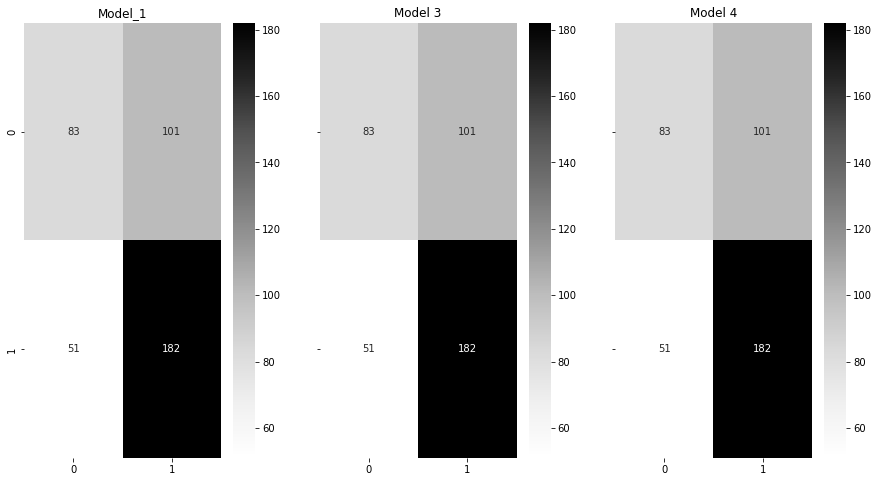

In [112]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 3');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Contraceptive_method_used'],model_4_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 4');

In [108]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Contraceptive_method_used'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Contraceptive_method_used'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 4')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Contraceptive_method_used'],model_4_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)


Model 1
True Negative: 83 
False Positives: 101 
False Negatives: 51 
True Positives: 182 


Model 3
True Negative: 83 
False Positives: 101 
False Negatives: 51 
True Positives: 182 


Model 4
True Negative: 83 
False Positives: 101 
False Negatives: 51 
True Positives: 182


In [104]:
print('Model 1')
print(metrics.classification_report(Test['Contraceptive_method_used'],model_1_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Contraceptive_method_used'],model_3_test_class),'\n')

print('Model 4')
print(metrics.classification_report(Test['Contraceptive_method_used'],model_4_test_class))


Model 1
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       233

    accuracy                           0.64       417
   macro avg       0.63      0.62      0.61       417
weighted avg       0.63      0.64      0.62       417
 

Model 3
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       233

    accuracy                           0.64       417
   macro avg       0.63      0.62      0.61       417
weighted avg       0.63      0.64      0.62       417
 

Model 4
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       184
           1       0.64      0.78      0.71       233

    accuracy                           0.64       417
   macro avg       0.63      0.62      0.61       417
weighted avg       0.63      0.64      0.62   

#### Q8. Check the summary statistics of the AUC-ROC curve for all the three Logistic Regression Models built. This is for the test data. - 1 point

In [105]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8


Model 1 AUC: 0.65276


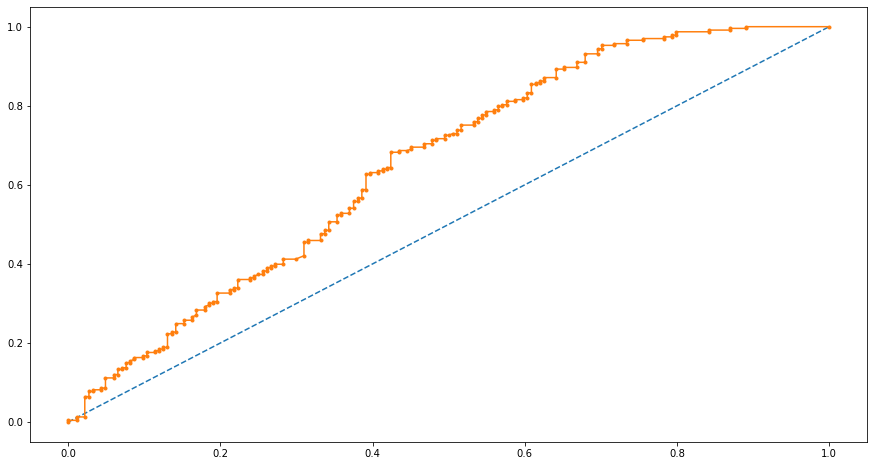

Model 3 AUC: 0.65276


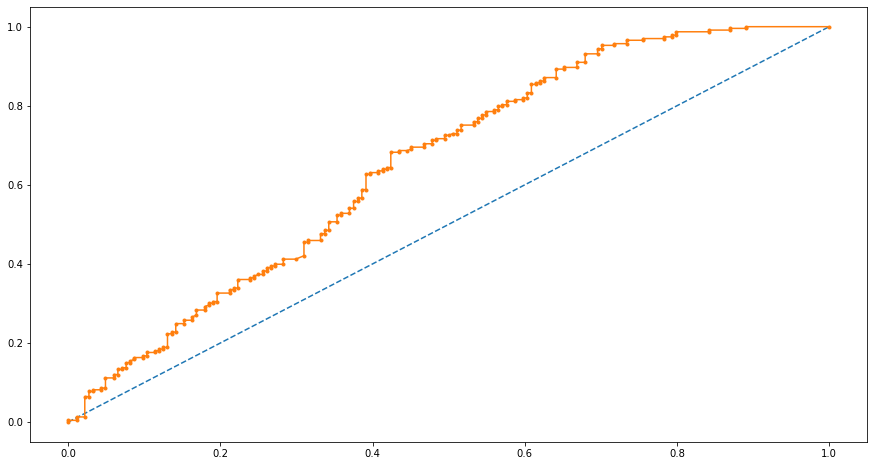

Model 4 AUC: 0.65276


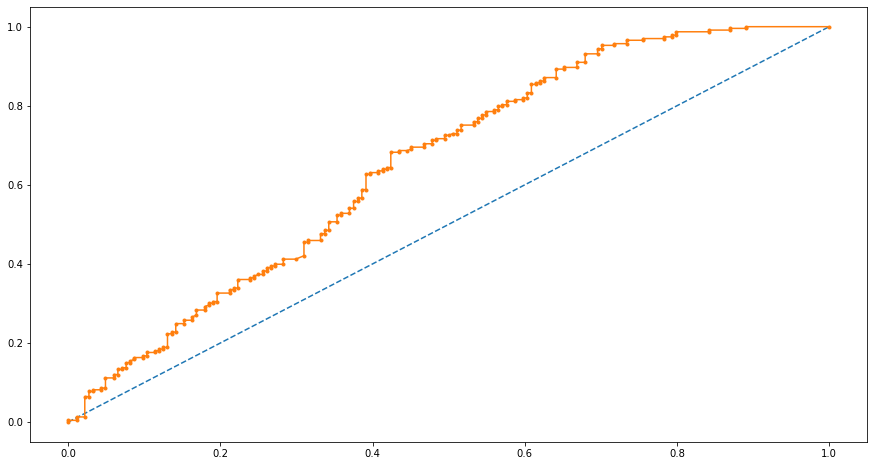

In [106]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 4


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 4 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_4_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


#### Model 1 - Predicting the classes and the probabilities on the Test Data

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
